In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import uproot

In [3]:
datapath = "/home/haue/repositories/Masters/data/pad_calibration/"
ch_file = datapath+"padmatcher_peaks.txt"
cal_file = datapath+"padcalc_peaks.txt"

In [4]:
dtype = [('detector', 'U10'), ('channel', 'i4'), ('xvalue', 'i4'), ('mean', 'f8'), ('sigma', 'f8')]

ch_data = np.genfromtxt(ch_file, dtype=dtype, encoding=None)
cal_data = np.genfromtxt(cal_file, dtype=dtype, encoding=None)
# Access each column using field names:

ch_means = ch_data['mean']
ch_sigmas = ch_data['sigma']
cal_means = cal_data['mean']
cal_sigmas = cal_data['sigma']

nrpeaks = 4

def lin(x, a, b):
    return a*x+b

-338.06504074139076 3.481816316328987
[-0.53546022  0.8730384  -0.33757822]
-295.3267480732326 3.094318712888462
[-3.07230757  5.10316947 -2.03086222]
-304.378816250088 3.1674153475152966
[-1.12399886  1.84169761 -0.71769863]
-314.69664693042847 3.177795744224188
[-3.14876623  5.23237031 -2.08360423]


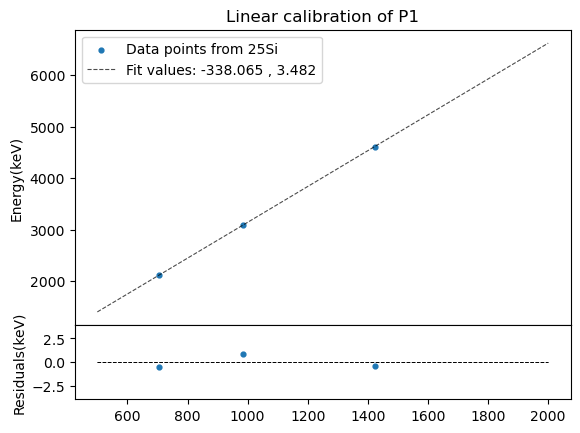

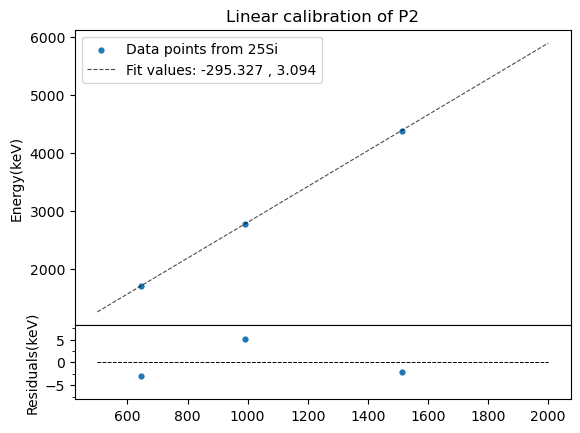

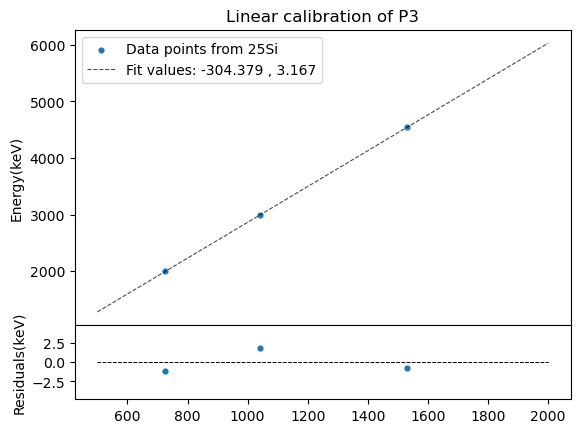

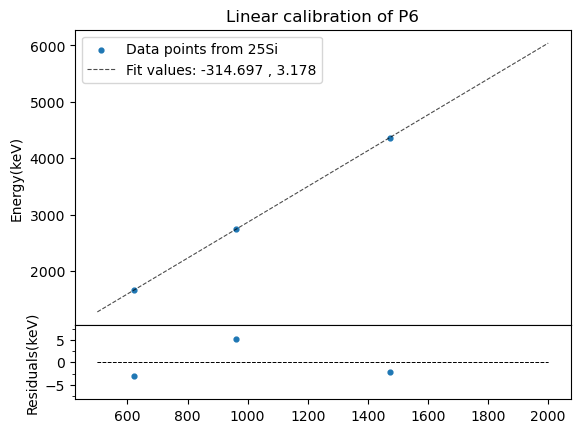

In [5]:
mask_to_keep = np.array([True, True, False, True])
for i in range(1,5):
    ch_x = ch_means[nrpeaks*(i-1):nrpeaks*i]
    cal_x = cal_means[nrpeaks*(i-1):nrpeaks*i]
    ch_x = ch_x[mask_to_keep]
    cal_x = cal_x[mask_to_keep]
    pad = f"P{i}"
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1], 'hspace': 0}, sharex=True)
    ax1, ax2 = axs
    
    popt, _ = sc.curve_fit(lin, ch_x, cal_x)
    
    xs = np.linspace(500, 2000)
    fitvals = lin(ch_x, popt[0], popt[1])
    resi = cal_x-fitvals
    ax1.scatter(ch_x, cal_x, s=12, label="Data points from 25Si")
    ax1.plot(xs,lin(xs, popt[0], popt[1]), ls='--',color='k', alpha=0.7, lw=0.8,label=f"Fit values: {np.round(popt[1], 3)} , {np.round(popt[0], 3)}")
    ax1.set_xlabel("Channel")
    ax1.set_ylabel("Energy(keV)")
    if i==4:
        pad = "P6"
    ax1.set_title(f"Linear calibration of {pad}")
    ax1.legend()
    
    ax2.hlines(0, 500,2000, color='grey', ls='--', lw=0.7)
    ax2.scatter(ch_x, resi, s=12)
    #ax2.legend(fontsize='x-small', loc='lower right')
    ax2.hlines(0, 500, 2000, ls='--', color='k', lw=0.7) 
    ax2.set_yticks(np.arange(-15,15,2.5), minor=True)
    ax2.set_ylim(-np.max(np.abs(resi))-3, np.max(np.abs(resi))+3)
    ax2.set_ylabel("Residuals(keV)")
    print(popt[1], popt[0])
    print(resi)
    
#-364.72004274357744 3.496200297901778
#-285.96409610289203 3.0793560775868785
#-314.8331916517445 3.1678775582667975
#-346.640676469352 3.196578063168012

In [11]:
##### comparison with alpha
base = "P3"
with uproot.open("../../data/cal/3aha.root") as file:
    # data
    y1a, x1a = file[base].to_numpy()
    x0a = np.min(x1a)
    x1a = x1a[:-1] + 0.5
    # tspectrum
    y2a, x2a = file[base + "A"].to_numpy()
    x2a = x2a[:-1] + 0.5 + x0a
    # peak positions, in found order
    x3a, y3a = file[base + "P"].values()
    x3a = x3a + x0a
with uproot.open("../../data/pad_calibration/padmatcher.root") as file:
    # data
    y1p, x1p = file["P3ch"].to_numpy()
    x0p = np.min(x1p)
    x1p = x1p[:-1] + 0.5
x3a, y3a, ch_means, cal_means
x3p = ch_means[nrpeaks*2:nrpeaks*3]
x3p = x3p[mask_to_keep]
xcal = cal_means[nrpeaks*2:nrpeaks*3]
xcal = xcal[mask_to_keep]


-334.0105837901541 3.1435126747885684
[ 1.69825579 -3.51414622  1.81589042]


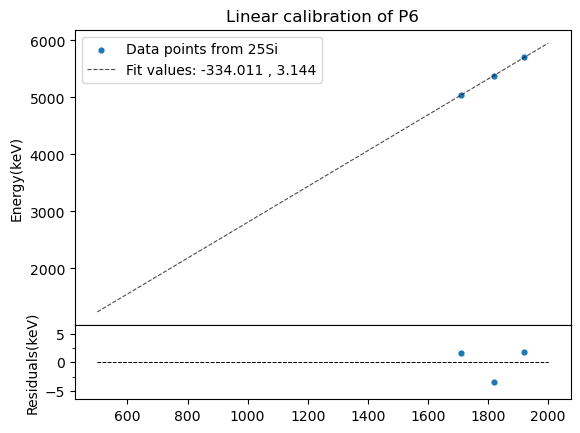

In [14]:
sim_pad_Es = [5046.23, 5380.51, 5703.34]
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1], 'hspace': 0}, sharex=True)
ax1, ax2 = axs
    
popt, _ = sc.curve_fit(lin, x3a, sim_pad_Es)
    
xs = np.linspace(500, 2000)
fitvals = lin(x3a, popt[0], popt[1])
resi = sim_pad_Es-fitvals
ax1.scatter(x3a, sim_pad_Es, s=12, label="Data points from 25Si")
ax1.plot(xs,lin(xs, popt[0], popt[1]), ls='--',color='k', alpha=0.7, lw=0.8,label=f"Fit values: {np.round(popt[1], 3)} , {np.round(popt[0], 3)}")
ax1.set_xlabel("Channel")
ax1.set_ylabel("Energy(keV)")


ax1.set_title(f"Linear calibration of {pad}")
ax1.legend()
    
ax2.hlines(0, 500,2000, color='grey', ls='--', lw=0.7)
ax2.scatter(x3a, resi, s=12)
    #ax2.legend(fontsize='x-small', loc='lower right')
ax2.hlines(0, 500, 2000, ls='--', color='k', lw=0.7) 
ax2.set_yticks(np.arange(-15,15,2.5), minor=True)
ax2.set_ylim(-np.max(np.abs(resi))-3, np.max(np.abs(resi))+3)
ax2.set_ylabel("Residuals(keV)")
print(popt[1], popt[0])
print(resi)
    
#-364.72004274357744 3.496200297901778
#-285.96409610289203 3.0793560775868785
#-314.8331916517445 3.1678775582667975
#-346.640676469352 3.196578063168012

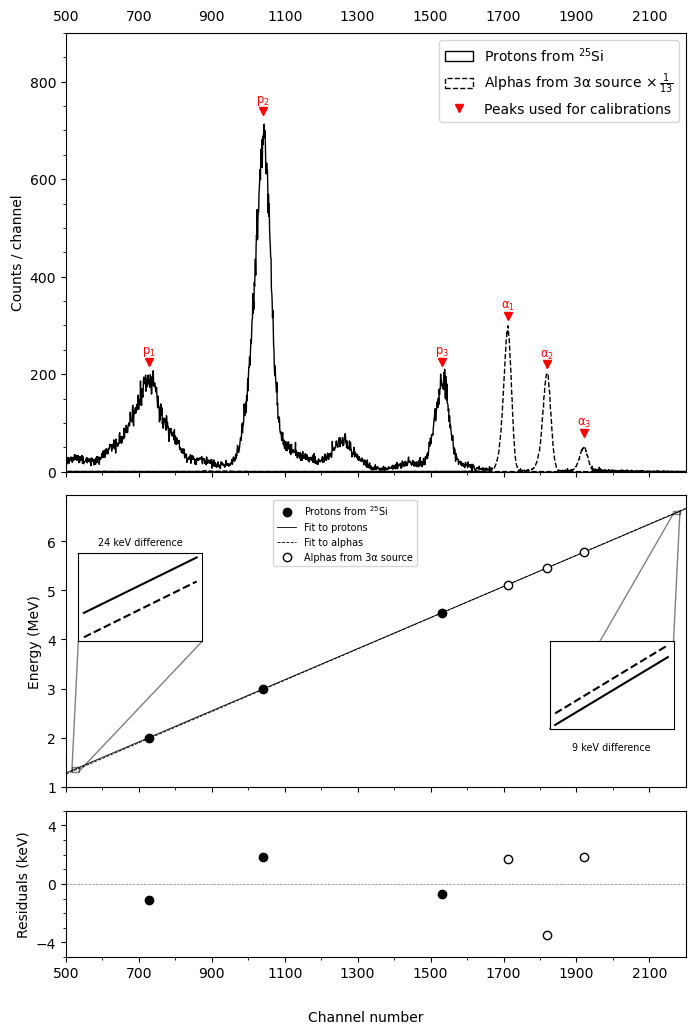

In [ ]:

# --- Definitions from your script ---
# These are preserved exactly as you provided them.
xl1_ = 500
xu1_ = 2200
sim_pad_Es = [5046.23, 5380.51, 5703.34]
def lin(x, a, b):
    return a*x + b
def lin_err(x, aerr, berr, aberr):
    return np.sqrt(aerr*x**2* + berr + x*aberr)
# U5F7 alpha 6.827784370976031 3.6347515137514383
# U5F7 alpha [ 1.13010269 -2.32512651  1.19502382]
#U5F7 p -19.90772265800977 3.6715577680429927
# [-1.17159999  1.30635843  4.25521774 -1.45560435  8.98940385  1.67941548 -1.88692107]
XP_ = np.linspace(xl1_, xu1_, 100)
aa_prot = 3.1674153475152966
bb_prot = -304.378816250088
aa_alph = 3.1435126747885684#*1.014
bb_alph = -334.0105837901541#*1.014

#[-1.12399886  1.84169761 -0.71769863]
# The following data variables are assumed to be defined elsewhere in your script:
# x1p_, y1p_, x1a_, y1a_, x3p_, y3p_, x3a_

# --- Create a single 3x1 figure grid ---
# This standard command replaces the custom 'prepare_two_column_figure' function.
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    sharex=True,
    figsize=(8, 12),  # A reasonable size for a 3x1 vertical layout
    gridspec_kw={'hspace': 0.08, 'height_ratios': [3, 2, 1]}
)

# --- Populate the Top Plot (axes[0]) ---
ax = axes[0]
xpl = np.min(x1p)
xpu = np.max(x1p)

ax.fill_between(x1p, 0, y1p, edgecolor='k', facecolor='w', label='Protons from $^{25}\mathrm{Si}$')
ax.fill_between(x1a[x1a > xl1_ + 5], 0, y1a[x1a > xl1_ + 5]/13, edgecolor='k', facecolor='w', linestyle='--',
                label='Alphas from 3α source $\\times\,\\frac{1}{13}$')

ax.set_yticks(np.arange(0, 900 + 200, 200))
ax.set_yticks(np.arange(0, 900 + 50, 50), minor=True)
ax.set_ylim(0, 900)
ax.tick_params(labeltop=True) # `sharex=True` handles labelbottom=False automatically
ax.set_ylabel("Counts / channel")

y4p_ = np.array([225, 740, 225])
ax.plot(x3p, y4p_, c='r', ls='', marker='v', label='Peaks used for calibrations')
subs = ["1","2", "3"]
for x, y, sub in zip(x3p, y4p_, subs):
    ax.text(x, y+7, "$\mathrm{p_{%s}}$" % sub, va='bottom', ha='center', c='r', size='small')
y3a_ = [320, 220, 80]
ax.plot(x3a[0:3], y3a_, c='r', ls='', marker='v')
subs = ["1", "2", "3"]
for x, y, sub in zip(x3a[0:3], y3a_, subs):
    ax.text(x, y+7, "$\mathrm{\\alpha_{%s}}$" % sub, va='bottom', ha='center', c='r', size='small')

ax.legend(loc='upper right')

# --- Populate the Middle Plot (axes[1]) ---
ax = axes[1]
ax.plot(x3p, lin(x3p, aa_prot, bb_prot)/1e3, 'ko', label='Protons from $^{25}\mathrm{Si}$')
ax.plot(XP_, lin(XP_, aa_prot, bb_prot)/1e3, 'k-', lw=0.6, label='Fit to protons')
ax.plot(XP_, lin(XP_, aa_alph, bb_alph)/1e3, 'k--', lw=0.6, label='Fit to alphas')
ax.plot(x3a[0:3], lin(x3a[0:3], aa_alph, bb_alph)/1e3, 'ko', markerfacecolor='w', zorder=10,
        label='Alphas from 3α source')

axin1 = ax.inset_axes([0.02, 0.5, 0.20, 0.30])
f1_ = (500 < XP_) & (XP_ < 550)
axin1.plot(XP_[f1_], lin(XP_[f1_], aa_prot, bb_prot)/1e3, 'k-')
axin1.plot(XP_[f1_], lin(XP_[f1_], aa_alph, bb_alph)/1e3, 'k--')
axin1.set_xticks([])
axin1.set_yticks([])
ax.indicate_inset_zoom(axin1, edgecolor="black")
axin1.set_title(f"{int(abs(lin(xl1_,aa_prot,bb_prot)-lin(xl1_,aa_alph,bb_alph)))} keV difference", fontsize='x-small')

axin2 = ax.inset_axes([0.98-0.20, 0.2, 0.20, 0.30])
f2_ = (2150 < XP_) & (XP_ < 2200)
axin2.plot(XP_[f2_], lin(XP_[f2_], aa_prot, bb_prot)/1e3, 'k-')
axin2.plot(XP_[f2_], lin(XP_[f2_], aa_alph, bb_alph)/1e3, 'k--')
axin2.set_xticks([])
axin2.set_yticks([])
ax.indicate_inset_zoom(axin2, edgecolor="black")
axin2.set_title(f"{int(abs(lin(xu1_,aa_prot,bb_prot)-lin(xu1_,aa_alph,bb_alph)))} keV difference", y=-0.34, fontsize='x-small')

ax.set_yticks(np.arange(1, 6, 1), minor=True)
ax.legend(fontsize='x-small', loc='upper center', bbox_to_anchor=(0.45, 1))
ax.set_ylabel("Energy (MeV)")

# --- Populate the Bottom Plot (axes[2]) ---
ax = axes[2]
ax.plot([xl1_, xu1_], [0, 0], ls='--', c='grey', lw=0.5)
ax.plot(x3p, [-1.12399886,  1.84169761, -0.71769863], 'ko')
ax.plot(x3a[0:3], [ 1.69825579, -3.51414622 , 1.81589042], 'ko', markerfacecolor='w')
ax.set_ylabel("Residuals (keV)")
ax.set_ylim(-3.5, 3.5)
ax.set_yticks(np.arange(-4, 4 + 4,4))
ax.set_yticks(np.arange(-5, 5 + 1, 1), minor=True)

ax.set_xlim(xl1_, xu1_)
ax.set_xticks(np.arange(500, 2200, 200))
ax.set_xticks(np.arange(500, 2200, 100), minor=True)

# --- Final Figure-level Formatting ---
fig.text(0.5, 0.06, 'Channel number', rotation='horizontal', ha='center', va='center')
plt.savefig("P3comp.pdf", bbox_inches='tight')
plt.show()